<a href="https://colab.research.google.com/github/Sanjiv97/Numerical-Methods/blob/main/Project_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 7**#
##Aayush K, Sanjiv T, Kushal K, Bekkah M##
###Numerical Methods--Dr Jacob###

First, I will load all of the packages needed to help make this project a success. 

In [130]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math
f =lambda x : 1/(1-x)
  

%matplotlib inline

#***Riemann Integration***#

Our original function from Project 1 was $\frac {1}{1-x}\ $. We will evaluate this function on the interval [-3,0] to find the signed area under the curve pictured below:

Text(0.5, 1.0, 'Graph of Original Function')

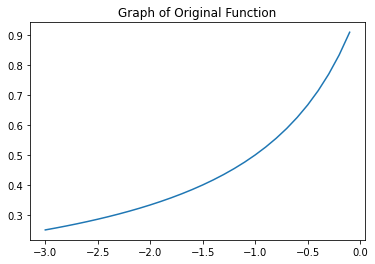

In [131]:
x = np.arange(-3,0,0.1)
plt.plot(x,f(x))
plt.title('Graph of Original Function',)

$$
A = \int_{-3}^0 \frac {1}{1-x}\ dx
$$

Using the u-substitution method and changing the bounds of the integral to reflect that: 
**u = (1-x)**
$$
A = \int_{4}^1 -\frac {1}{u}\ du
$$

Factoring out the constant and completing the integral will give us: 
$$
A = -\int_{4}^1 \frac {1}{u}\ du
$$

$$
 = ln|u|\vert_4^1 \
$$
$$
= ln|4|-ln|1|
$$
$$
= 2ln(2)\approx 1.38629
$$




That integral wasn't too hard! I'll now use software implemented in python to check the answer I got. 

In [132]:
integrate.quad(f,-3,0)

(1.3862943611198906, 5.81399868904736e-11)

Our value and the computer's match, so we know we did it correctly!

In [133]:
def dlx(a,b,n):
  return (b-a)/n
 
def riemannSum(function,a,b,n,indicator = 'R'):
  dx = dlx(a,b,n)
  if indicator == 'R':
    start = 1
  elif indicator == 'L':
    start = 0
  elif indicator == 'M':
    start = 0.5
  sum = 0
  for j in np.arange(start,n+start):
    sum = sum + function(a + j*dx)*dx
  return sum

Now,implementing our function f(x)=1/1-x in the riemannSum to get left end point.

In [134]:
riemannSum(f,-3,0,10,'L')

1.2807610298649446

Now,implementing our function f(x)=1/1-x in the riemannSum to get the value of mid point.

In [135]:
riemannSum(f,-3,0,10,'M')

1.3828350011601598

Again,implementing our function f(x)=1/1-x in the riemannSum to get value for right end point.

In [136]:
riemannSum(f,-3,0,10,'R')

1.5057610298649446

Let's visualize rectangles in the left, right and midpoint Riemann sums for the function f(x)= 1/1-x.

over the interval [-3,0] with a partition of size n = 10 .

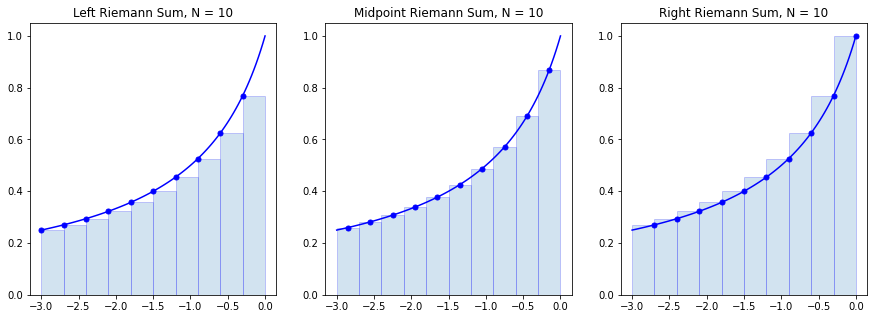

In [137]:
f = lambda x : 1/(1-x)
a = -3; b = 0; N = 10
n = 10 # Use n*N+1 points to plot the function smoothly

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(X,Y,'b')
x_left = x[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Left Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,2)
plt.plot(X,Y,'b')
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = f(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10)
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
plt.title('Midpoint Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,3)
plt.plot(X,Y,'b')
x_right = x[1:] # Left endpoints
y_right = y[1:]
plt.plot(x_right,y_right,'b.',markersize=10)
plt.bar(x_right,y_right,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Right Riemann Sum, N = {}'.format(N))

plt.show()

Notice that when the function f(x) is increasing on  the left endpoints give an underestimate of the integral  and right endpoints give an overestimate. The opposite is true is when the function is decreasing.

#Simpson Frac Rule
$$
\int_a^b f(x)\ dx
\approx 
\frac{\Delta x}3 
\left[
f(a)
+
4\sum_{odd} f(x_i)
+
2\sum_{even} f(x_i)
+
f(b)
\right]
$$

In [138]:
def simpson(function, a, b , n):
  dx = dlx(a,b,n)
  sum = 0
  for i in range(1,n,2): 
    sum = sum + 4*function(a+dx*i)
  for i in range(0,n,2): 
    sum = sum + 2*function(a+dx*i)
  for i in [a,b]: 
    sum = sum + function(i)
  sum = dx /3 *sum
  return sum

 Implementing our function f(x)=1/1-x in the Simpsons rule.

In [139]:
simpson(f, -3 , 0,10)

1.4365201814038322

#Trapezoid Rule
It states that it is a rule which evaluates the area under the curves by dividing the total area into smaller trapezoids. Then, the integration is found out by the approximation of the region under the graph of a function of its trapezoid.
$$
\int_a^b f(x)\ dx\approx \frac{\Delta x}{2}
\left[
f(a) 
+
2\left(
\sum_{i=1}^{n-1} f(a+i\Delta x)
  \right)
  +
  f(b)
  \right]
$$


In [140]:
def trapezoid (function, a, b, n):
  dx = dlx(a,b,n)
  sum = 0
  for i in range(1,n):
    sum = sum + 2*function(a+i*dx)
  for i in [a,b]:
    sum = sum +function(i)
  sum = dx/2 *sum
  return sum

 Implementing our function f(x)=1/1-x in the defined function of  Trapezoid.

In [141]:
trapezoid(f, -3 , 0, 10)

1.3932610298649446